In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# The following files contain the FoldSeek sequence-based clusters (AFDB50) and structure-based
# clusters (FoldSeek-Cluster), subset to only include SwissProt proteins.
foldseek_dir = "/weka/scratch/weka/kellislab/rcalef/data/foldseek_cluster"

seq_cluster_path = os.path.join(foldseek_dir, "afdb50_clusters_swissprot.tsv")
struct_cluster_path = os.path.join(foldseek_dir, "foldseek_clusters_swissprot.tsv")

In [3]:
# `rep_id` gives the UniProt ID of the representative for the cluster, `uniprot_id` gives
# the UniProt ID for the actual individual protein. File has an extraneous blank column.
seq_cluster_assignments = pd.read_table(seq_cluster_path, names=["rep_id", "uniprot_id", "X"]).drop(columns=["X"])
seq_cluster_assignments.head()

,rep_id,uniprot_id
0,A0A1Z5LF99,Q7JYV2
1,B9LLY0,B9LLY0
2,B9LLY0,A9WHT8
3,P07316,A3RLE1
4,P07316,P04344


In [4]:
# `rep_id` gives the UniProt ID of the representative for the cluster, `uniprot_id` gives
# the UniProt ID for the actual individual protein.
# `clust_type` describes the reason the protein is included in the cluster (i.e. based on sequence or structure),
# or whether or not FoldSeek authors excluded it and why.
# `tax_id` is just taxonomic ID for organism
# See description for file `5-allmembers-repId-entryId-cluFlag-taxId.tsv.gz` here:
#  https://afdb-cluster.steineggerlab.workers.dev/

struct_cluster_assignments = pd.read_table(struct_cluster_path, names=["rep_id", "uniprot_id", "clust_type", "tax_id"])
struct_cluster_assignments.head()

,rep_id,uniprot_id,clust_type,tax_id
0,A0A009J8A1,P0ACU7,1,83333
1,A0A009J8A1,P0ACU8,1,199310
2,A0A009J8A1,P0ACU9,1,623
3,A0A010QBH7,P87145,2,284812
4,A0A010R299,Q2U1H5,2,510516


In [5]:
def explore_clusters(clust_df: pd.DataFrame):
    clust_counts = clust_df.rep_id.value_counts().reset_index()
    # Note that singleton clusters here may not originally be singletons, since clusters
    # were constructed using all of UniProt, whereas here we're only looking at SwissProt.
    print(f"{clust_counts.shape[0]} clusters covering {clust_df.shape[0]} proteins, {(clust_counts['count'] == 1).sum()} singleton clusters")

    sns.ecdfplot(
        data=clust_counts,
        x="count",
        log_scale=True,
    )
    plt.twinx()

    sns.ecdfplot(
        data=clust_counts,
        x="count",
        log_scale=True,
        stat="count",
    )

210709 clusters covering 547785 proteins, 138093 singleton clusters


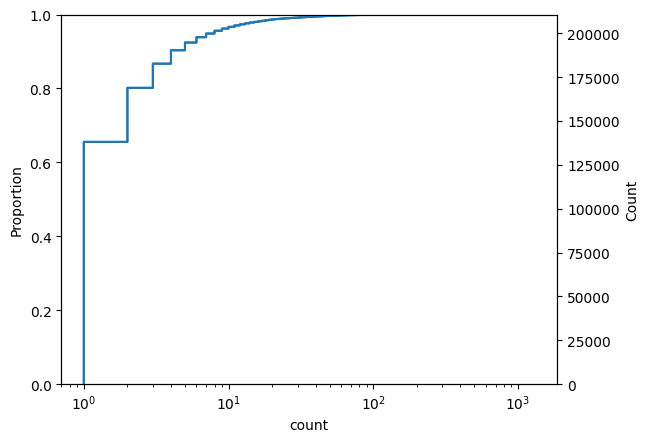

In [6]:
explore_clusters(seq_cluster_assignments)

74251 clusters covering 547785 proteins, 38641 singleton clusters


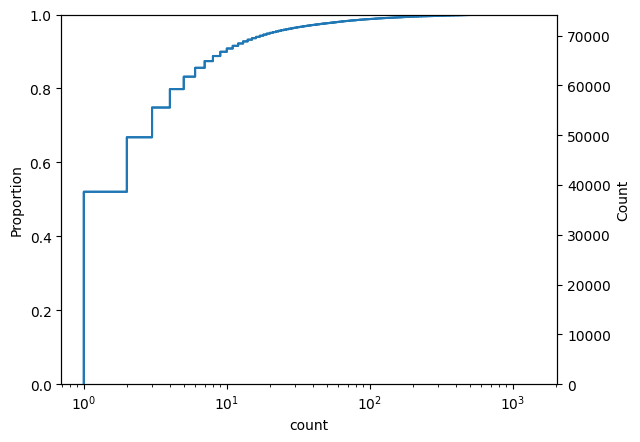

In [8]:
explore_clusters(struct_cluster_assignments)

In [9]:
# Get path to mmCIF or PDB file given a UniProt ID
want_id = struct_cluster_assignments.uniprot_id.iat[0]
want_id

'P0ACU7'

In [10]:
cif_tmpl = "/weka/scratch/weka/kellislab/rcalef/data/cif_alphafolddb/AF-%s-F1-model_v4.cif.gz"
pdb_tmpl = "/weka/scratch/weka/kellislab/rcalef/data/pdb_alphafolddb/AF-%s-F1-model_v4.pdb"

print(os.path.exists(cif_tmpl % want_id))
print(os.path.exists(pdb_tmpl % want_id))

True
True
